In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import imageio
import glob
import shutil
import cv2

In [10]:
all_imgs = glob.glob('/home/rishabh/Data/animal10/raw-img/*/*')

In [11]:
path= '/home/rishabh/Data/animal10/animal10_cls/train'
animals = os.listdir(path)
animals.sort()

In [16]:
c = 23
c>23

False

In [18]:
for sub in animals:
    print(sub)
    files = glob.glob('/home/rishabh/Data/animal10/raw-img/'+sub+'/*')
    train_count = 0
    val_count = 0
    test_count = 0
    
    for file in files:
        #print(file)
        img = imageio.imread(file)
        height = img.shape[0]
        width = img.shape[1]
        name = file.split('/')[-1]
        if train_count<500 and height>150 and height<350 and width>150 and width<350:
            img_resize = cv2.resize(img, (320,250))
            plt.imsave('/home/rishabh/Data/animal10/resized_raw_images/train/'+sub+'/{}'.format(name),img_resize)
            train_count+=1
            continue
        
        elif val_count<215 and height>150 and height<350 and width>150 and width<350:
            img_resize = cv2.resize(img, (320,250))
            plt.imsave('/home/rishabh/Data/animal10/resized_raw_images/val/'+sub+'/{}'.format(name), img_resize)
            val_count+=1
            continue
            
    
        elif test_count<215:
            img_resize = cv2.resize(img, (320,250))
            plt.imsave('/home/rishabh/Data/animal10/resized_raw_images/test/'+sub+'/{}'.format(name), img_resize)
            test_count+=1
            continue
            
        if train_count>=500 and test_count>=215 and val_count>=215:
            break
    

cane
cavallo
elefante
farfalla
gallina
gatto
mucca
pecora
ragno
scoiattolo


## Albumentations

In [21]:
#!pip install albumentations

In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [3]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

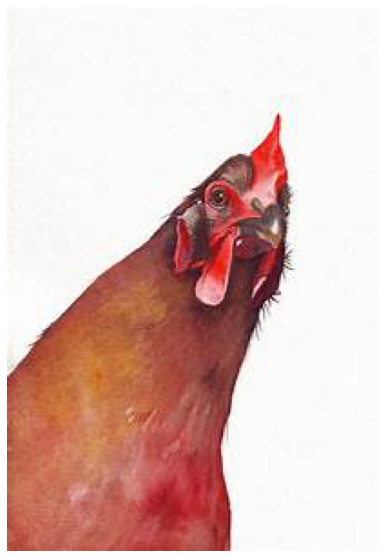

In [65]:
image = cv2.imread('/home/rishabh/animal_10cls/25epoch_train_wrong_pred/47_4_5_0.94.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

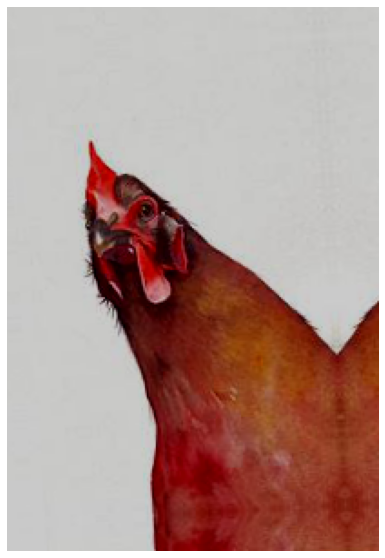

In [69]:
from albumentations.pytorch import ToTensorV2
transform = A.Compose([
    #A.CLAHE(),
    
    A.HorizontalFlip(p=0.5),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
   # A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.5),
  #  A.Blur(blur_limit=3),
#     A.OpticalDistortion(),
#     A.GridDistortion(),
 #   A.HueSaturationValue(),
  #  A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ])
    
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

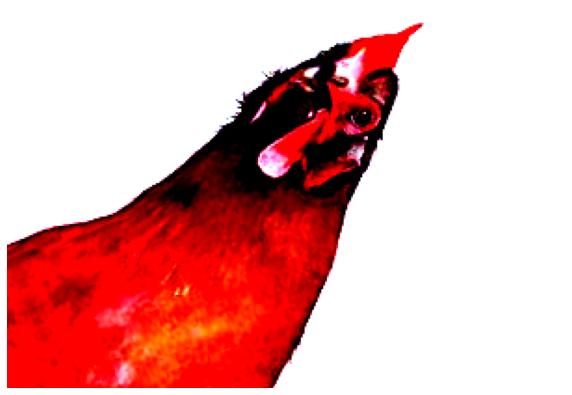

In [63]:
transform = A.Compose([
#     A.CLAHE(),
    A.RandomRotate90(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, always_apply=False, p=0.5),
    #A.Blur(blur_limit=3),
#     A.OpticalDistortion(),
#     A.GridDistortion(),
#     A.HueSaturationValue(),
    
#    ToTensorV2(),
])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

In [70]:
a = np.zeros(6000)
b = np.ones(6000)
c = np.ones(6000)*2
d = np.ones(6000)*3
e = np.ones(6000)*4
f = np.ones(6000)*5
g = np.ones(6000)*6
# h = np.ones(6000)*7
# i = np.ones(6000)*8
# j = np.ones(6000)*9
labels = np.concatenate((a,b,c,d,e,f,g), axis= 0)
print(labels.shape)

(42000,)


In [2]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)


/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
PATH = '/home/rishabh/Downloads/25epoch_model_5k.pt'
model_ft.load_state_dict(torch.load(PATH, map_location= torch.device('cpu')))
model_ft.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
classes = os.listdir('/home/rishabh/Data/animal10/animal10_cls/train')
classes.sort()


In [5]:
idx_to_labels = {}
for idx,clas in enumerate(classes):
    idx_to_labels[idx] = clas

In [6]:
inp = imageio.imread('/home/rishabh/animal_10cls/25epoch_test_wrong_pred/21_5_0_1.0.png')[:,:,:3]
print(inp.shape)

(194, 183, 3)


In [24]:
# files = glob.glob('/home/rishabh/animal_10cls/25epoch_test_wrong_pred/*')
# print(files[0])
# channel = []
# for i in files:
#     img = imageio.imread(i)
#     channel.append(img.shape[2])

/home/rishabh/animal_10cls/25epoch_test_wrong_pred/98_2_0_1.0.png


In [25]:
# print(channel)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


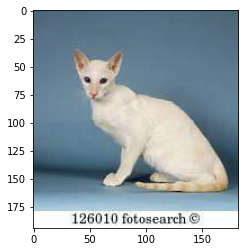

In [7]:
from PIL import Image
#im = Image.open("/home/rishabh/animal_10cls/25epoch_test_wrong_pred/21_5_0_1.0.png")
im = Image.fromarray(inp)
plt.imshow(im)
plt.show()

In [8]:
from torchvision import datasets, models, transforms
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


transformed_image = transform(im)
print(transformed_image.shape)
t_image = transformed_image[None,:,:,:]
t_image.shape

torch.Size([3, 224, 224])


torch.Size([1, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


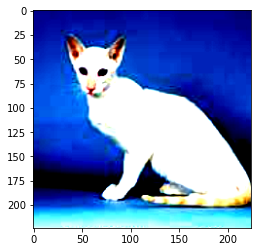

In [9]:
t_img = transformed_image.cpu().detach().numpy()
t_img = t_img.transpose((1,2,0))
plt.imshow(t_img)
plt.show()

In [47]:
print(t_img.min())

-2.117904


In [10]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [11]:
outputs = model_ft(t_image)
logit, pred = torch.max(outputs, 1)
prob = [round(sigmoid(i),3) for i in logit]

In [12]:
predicted_label = idx_to_labels[pred.squeeze().item()]
print(predicted_label)

cane


In [13]:
#!pip install captum
from captum.attr import IntegratedGradients

In [1]:
integrated_gradients = IntegratedGradients(model_ft)
attributions_ig = integrated_gradients.attribute(t_image, target=pred.squeeze(), n_steps=200)


NameError: name 'IntegratedGradients' is not defined

In [5]:
pd.set_option('display.max_rows', None)


In [7]:
import pandas as pd
pred_df = pd.read_csv('/home/rishabh/animal_10cls/model25epoch_pred_info.csv')
wrong_pred_df = pred_df[pred_df['Label']!= pred_df['Predicted']]
wrong_pred_df.reset_index()

,index,Label,Predicted,Confidence,Image Path
0,15,7,6,0.993,/home/rishabh/Data/animal10/animal_10_small_cl...
1,41,4,9,0.874,/home/rishabh/Data/animal10/animal_10_small_cl...
2,43,7,1,0.950,/home/rishabh/Data/animal10/animal_10_small_cl...
3,53,3,8,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
4,65,9,5,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
5,82,5,0,0.998,/home/rishabh/Data/animal10/animal_10_small_cl...
6,88,9,6,0.927,/home/rishabh/Data/animal10/animal_10_small_cl...
7,124,3,9,0.997,/home/rishabh/Data/animal10/animal_10_small_cl...
8,199,7,1,0.997,/home/rishabh/Data/animal10/animal_10_small_cl...
9,233,9,6,0.991,/home/rishabh/Data/animal10/animal_10_small_cl...


In [9]:
wrong_pred_df.iloc[21]['Image Path']

'/home/rishabh/Data/animal10/animal_10_small_cls/test/gatto/1575.jpeg'